# EPIC
# Ireland Greenhouse Gas Emmisions

---
# Setup

---
# Preprocessing

In [60]:
from pandas import read_csv
import pandas as pd

ev_sales = read_csv('data/ev_sales.csv')
ev_sales['Year'] = ev_sales['Month'].str[:4]
ev_sales = ev_sales.groupby(['Year'])['VALUE'].sum().reset_index().astype({'Year': 'int64'})
ev_sales = ev_sales[ev_sales['Year'] < 2020]

zeros = [[year, 0] for year in range(1990, 2015)]
z = pd.DataFrame(zeros, columns=['Year', 'VALUE'])
ev_sales = pd.concat([z, ev_sales], ignore_index=True)
ev_sales

,Year,VALUE
0,1990,0
1,1991,0
2,1992,0
3,1993,0
4,1994,0
5,1995,0
6,1996,0
7,1997,0
8,1998,0
9,1999,0


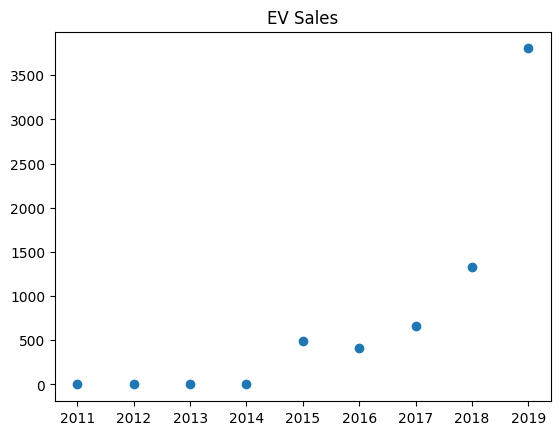

In [63]:
from matplotlib import pyplot as plt

plt.scatter(ev_sales['Year'][-9:], ev_sales['VALUE'][-9:])
plt.title('EV Sales')
plt.show()

In [57]:
co2 = read_csv('data/CO2-Emissions.csv')
co2 = co2[co2['Country Code'] == 'IRL'].iloc[:,34:-4]
co2 = co2.transpose().reset_index()
co2.columns = ['Year', 'Value']
co2 = co2.astype({'Year': 'int64'})
co2

,Year,Value
0,1990,8.810964
1,1991,8.903398
2,1992,8.853736
3,1993,8.851032
4,1994,9.140716
5,1995,9.268405
6,1996,9.572812
7,1997,9.790644
8,1998,10.348006
9,1999,10.645960


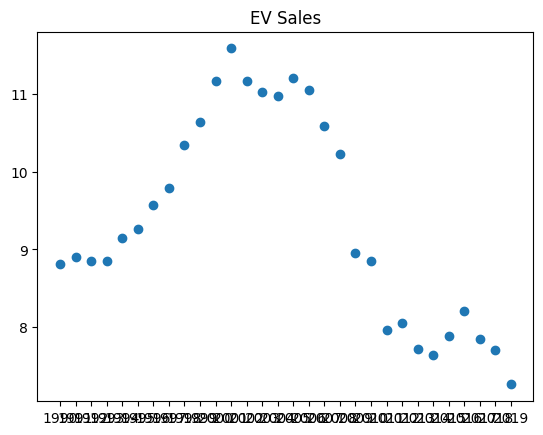

In [17]:
plt.scatter(co2['Year'], co2['Value'])
plt.title('EV Sales')

plt.show()

In [66]:
df = pd.merge(ev_sales, co2, on='Year', how='outer')
df.columns = ['Year', 'EV Sales', 'CO2 Emissions']
df


,Year,EV Sales,CO2 Emissions
0,1990,0,8.810964
1,1991,0,8.903398
2,1992,0,8.853736
3,1993,0,8.851032
4,1994,0,9.140716
5,1995,0,9.268405
6,1996,0,9.572812
7,1997,0,9.790644
8,1998,0,10.348006
9,1999,0,10.645960
